# Business Case

ABC Tech is an mid-size organisation operation in IT-enabled business 
segment over a decade. On an average ABC Tech receives 22-25k IT 
incidents/tickets , which were handled to best practice ITIL framework 
with incident management , problem management, change management 
and configuration management processes. These ITIL practices attained 
matured process level and a recent audit confirmed that further 
improvement initiatives may not yield return of investment.
ABC Tech management is looking for ways to improve the incident 
management process as recent customer survey results shows that 
incident management is rated as poor.

# Enhancing Efficiency and Proactive Service Delivery at ABC Tech

ABC Tech management recently attended Machine Learning conference on 
ML for ITSM. 
Machine learning looks prospective to improve ITSM processes through 
prediction and automation. They came up with 4 key areas, where ML can 
help ITSM process in ABC Tech.
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so 
that they can take preventive measures or fix the problem before 
it surfaces.
2. Auto tag the tickets with right priorities and right departments so 
that reassigning and related delay can be reduced.
3. Predict RFC (Request for change) and possible failure / 
misconfiguration of ITSM assets.
4. Forecast the incident volume in different fields, so that they can be better prepared with resources and 
technology planning.

# Importing libararies

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\91961\Downloads\Data_dia.csv")

# Basic checks

In [3]:
data.head()

CI_Name          CI_Cat              CI_Subcat        WBS Incident_ID  \
0  SUB000508  subapplication  Web Based Application  WBS000162   IM0000004   
1  WBA000124     application  Web Based Application  WBS000088   IM0000005   
2  DTA000024     application    Desktop Application  WBS000092   IM0000006   
3  WBA000124     application  Web Based Application  WBS000088   IM0000011   
4  WBA000124     application  Web Based Application  WBS000088   IM0000012   

   Status Impact Urgency  Priority  number_cnt  ...       Reopen_Time  \
0  Closed      4       4       4.0    0.601292  ...               NaN   
1  Closed      3       3       3.0    0.415050  ...  02-12-2013 12:31   
2  Closed     NS       3       NaN    0.517551  ...               NaN   
3  Closed      4       4       4.0    0.642927  ...               NaN   
4  Closed      4       4       4.0    0.345258  ...               NaN   

      Resolved_Time        Close_Time  Handle_Time_hrs  \
0  04-11-2013 13:50  04-11-2013 13:51   3,87,16,91,111   
1  02-12-2013 12:36  02-12-2013 12:36   4,35,47,86,389   
2  13-01-2014 15:12  13-01-2014 15:13   4,84,31,19,444   
3  14-11-2013 09:31  14-11-2013 09:31   4,32,18,33,333   
4  08-11-2013 13:55  08-11-2013 13:55   3,38,39,03,333   

                   Closure_Code No_of_Related_Interactions  \
0                         Other                        1.0   
1                      Software                        1.0   
2  No error - works as designed                        1.0   
3                Operator error                        1.0   
4                         Other                        1.0   

  Related_Interaction No_of_Related_Incidents No_of_Related_Changes  \
0           SD0000007                     2.0                   NaN   
1           SD0000011                     1.0                   NaN   
2           SD0000017                     NaN                   NaN   
3           SD0000025                     NaN                   NaN   
4           SD0000029                     NaN                   NaN   

  Related_Change  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 25 columns]

In [4]:
data.tail()

CI_Name       CI_Cat                 CI_Subcat        WBS  \
46601  SBA000464  application  Server Based Application  WBS000073   
46602  SBA000461  application  Server Based Application  WBS000073   
46603  LAP000019     computer                    Laptop  WBS000091   
46604  WBA000058  application     Web Based Application  WBS000073   
46605  DCE000077     hardware       DataCenterEquipment  WBS000267   

      Incident_ID  Status Impact Urgency  Priority  number_cnt  ...  \
46601   IM0047053  Closed      4       4       4.0    0.231896  ...   
46602   IM0047054  Closed      4       4       4.0    0.805153  ...   
46603   IM0047055  Closed      5       5       5.0    0.917466  ...   
46604   IM0047056  Closed      4       4       4.0    0.701278  ...   
46605   IM0047057  Closed      3       3       3.0    0.902320  ...   

      Reopen_Time     Resolved_Time        Close_Time  Handle_Time_hrs  \
46601         NaN  31-03-2014 16:29  31-03-2014 16:29            0,095   
46602         NaN  31-03-2014 15:29  31-03-2014 15:29      0,428333333   
46603         NaN  31-03-2014 15:32  31-03-2014 15:32      0,071666667   
46604         NaN  31-03-2014 15:42  31-03-2014 15:42      0,116944444   
46605         NaN  31-03-2014 22:47  31-03-2014 22:47      0,586388889   

      Closure_Code No_of_Related_Interactions Related_Interaction  \
46601        Other                        1.0           SD0147021   
46602   User error                        1.0           SD0146967   
46603     Hardware                        1.0           SD0146982   
46604     Software                        1.0           SD0146986   
46605     Hardware                        1.0           SD0147088   

      No_of_Related_Incidents No_of_Related_Changes Related_Change  
46601                     NaN                   NaN            NaN  
46602                     NaN                   NaN            NaN  
46603                     NaN                   NaN            NaN  
46604                     NaN                   NaN            NaN  
46605                     NaN                   NaN            NaN  

[5 rows x 25 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

Object datatypes found for many features

# Object to numeric

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# List of columns to convert from categorical to numeric
columns_to_convert = ['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
                       'Category', 'KB_number', 'Alert_Status', 'Closure_Code',
                       'Related_Interaction']
# Convert categorical values to numeric using cat.codes
data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.astype('category').cat.codes)

In [8]:
# List of date columns to convert to datetime
date_columns = ['Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time']

# Convert date columns to datetime
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors='coerce')


In [9]:

# List of columns to convert from object to numeric
columns_to_convert = ['Impact', 'Urgency','No_of_Related_Interactions','Related_Change']

# Convert the specified columns to numeric
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [10]:
columns_to_convert = ['Handle_Time_hrs']
# Convert categorical values to numeric using cat.codes
data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.astype('category').cat.codes)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  int16         
 1   CI_Cat                      46606 non-null  int8          
 2   CI_Subcat                   46606 non-null  int8          
 3   WBS                         46606 non-null  int16         
 4   Incident_ID                 46606 non-null  int32         
 5   Status                      46606 non-null  int8          
 6   Impact                      45226 non-null  float64       
 7   Urgency                     46605 non-null  float64       
 8   Priority                    45226 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  int8          
 11  KB_number                   46606 non-null  int16     

In [12]:
data.describe().T

count          mean           std       min  \
CI_Name                     46606.0   2239.249646    752.110484  0.000000   
CI_Cat                      46606.0      3.130284      3.841185 -1.000000   
CI_Subcat                   46606.0     41.649058     17.155322 -1.000000   
WBS                         46606.0    108.139961     69.926006  0.000000   
Incident_ID                 46606.0  23302.500000  13454.137660  0.000000   
Status                      46606.0      0.000193      0.013895  0.000000   
Impact                      45226.0      4.223632      0.705474  1.000000   
Urgency                     46605.0      4.189529      0.724743  1.000000   
Priority                    45226.0      4.215805      0.705624  1.000000   
number_cnt                  46606.0      0.499658      0.288634  0.000023   
Category                    46606.0      1.379393      0.784568  0.000000   
KB_number                   46606.0    885.576106    484.340735  0.000000   
Alert_Status                46606.0      0.000000      0.000000  0.000000   
No_of_Reassignments         46605.0      1.131831      2.269774  0.000000   
Handle_Time_hrs             46606.0  12309.507810   9457.701835 -1.000000   
Closure_Code                46606.0      7.002661      3.479021 -1.000000   
No_of_Related_Interactions  46492.0      1.149897      2.556338  1.000000   
Related_Interaction         46606.0  19891.438506  13241.775979  0.000000   
No_of_Related_Incidents      1222.0      1.669394      3.339687  1.000000   
No_of_Related_Changes         560.0      1.058929      0.403596  1.000000   
Related_Change                  0.0           NaN           NaN       NaN   

                                     25%           50%           75%  \
CI_Name                      2269.000000   2487.000000   2725.000000   
CI_Cat                          1.000000      1.000000      3.000000   
CI_Subcat                      42.000000     45.000000     57.000000   
WBS                            59.000000     73.000000    165.000000   
Incident_ID                 11651.250000  23302.500000  34953.750000   
Status                          0.000000      0.000000      0.000000   
Impact                          4.000000      4.000000      5.000000   
Urgency                         4.000000      4.000000      5.000000   
Priority                        4.000000      4.000000      5.000000   
number_cnt                      0.248213      0.500269      0.749094   
Category                        1.000000      1.000000      1.000000   
KB_number                     534.000000    857.000000   1267.000000   
Alert_Status                    0.000000      0.000000      0.000000   
No_of_Reassignments             0.000000      0.000000      2.000000   
Handle_Time_hrs              3018.000000  11199.500000  20389.750000   
Closure_Code                    6.000000      6.000000     10.000000   
No_of_Related_Interactions      1.000000      1.000000      1.000000   
Related_Interaction          8105.250000  19756.500000  31407.750000   
No_of_Related_Incidents         1.000000      1.000000      1.000000   
No_of_Related_Changes           1.000000      1.000000      1.000000   
Related_Change                       NaN           NaN           NaN   

                                     max  
CI_Name                      3018.000000  
CI_Cat                         11.000000  
CI_Subcat                      63.000000  
WBS                           273.000000  
Incident_ID                 46605.000000  
Status                          1.000000  
Impact                          5.000000  
Urgency                         5.000000  
Priority                        5.000000  
number_cnt                      0.999997  
Category                        3.000000  
KB_number                    1824.000000  
Alert_Status                    0.000000  
No_of_Reassignments            46.000000  
Handle_Time_hrs             30637.000000  
Closure_Code                   13.000000  
No_of_Related_Inter

# Handling Null values

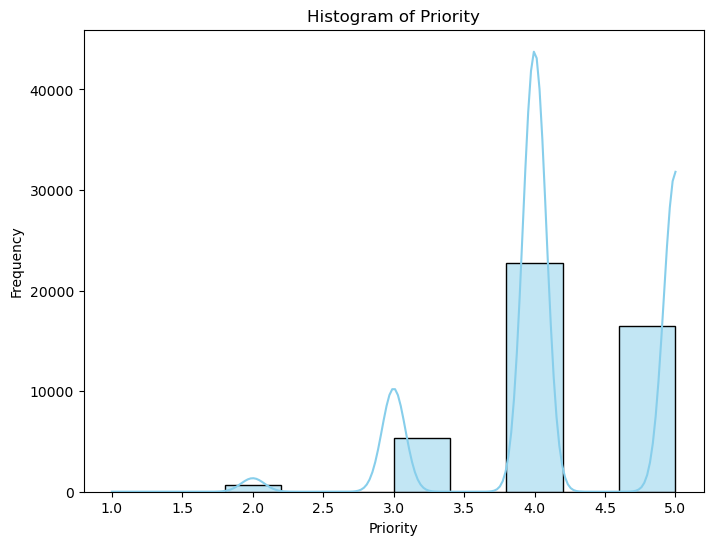

In [13]:
plt.figure(figsize=(8, 6), facecolor='white')

# Create a histogram for the 'Age' column
sns.histplot(data['Priority'], kde=True, bins=10, color='skyblue')
plt.title("Histogram of Priority")
plt.xlabel("Priority")
plt.ylabel("Frequency")

# Show the plot
plt.show()

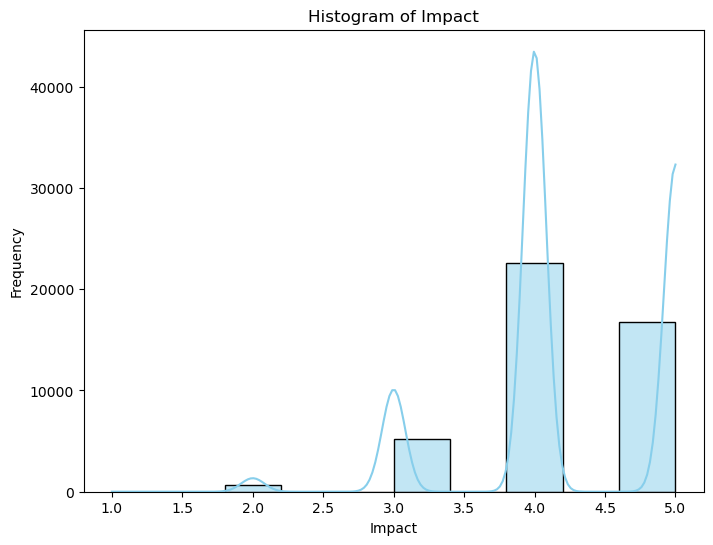

In [14]:
plt.figure(figsize=(8, 6), facecolor='white')

# Create a histogram for the 'Impact' column
sns.histplot(data['Impact'], kde=True, bins=10, color='skyblue')
plt.title("Histogram of Impact")
plt.xlabel("Impact")
plt.ylabel("Frequency")

# Show the plot
plt.show()

As per above charts null values can be replaced by Mode

In [15]:
data['Priority'].fillna(data['Priority'].mode()[0],inplace=True)
data['Impact'].fillna(data['Impact'].mode()[0],inplace=True)

In [16]:
# Fill 0 value for Null vales for below fields
# List of fields to fill with 0 values
fields_to_fill = ['No_of_Reassignments', 'Reopen_Time', 'Resolved_Time',
                  'No_of_Related_Interactions', 'No_of_Related_Incidents',
                  'No_of_Related_Changes', 'Related_Change']

# Iterate over each field and fill 0 values
for field in fields_to_fill:
    data[field].fillna(0, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  int16         
 1   CI_Cat                      46606 non-null  int8          
 2   CI_Subcat                   46606 non-null  int8          
 3   WBS                         46606 non-null  int16         
 4   Incident_ID                 46606 non-null  int32         
 5   Status                      46606 non-null  int8          
 6   Impact                      46606 non-null  float64       
 7   Urgency                     46605 non-null  float64       
 8   Priority                    46606 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  int8          
 11  KB_number                   46606 non-null  int16     

In [18]:
# List of date columns to convert to datetime
date_columns = ['Reopen_Time', 'Resolved_Time']

# Convert date columns to datetime
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors='coerce')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  int16         
 1   CI_Cat                      46606 non-null  int8          
 2   CI_Subcat                   46606 non-null  int8          
 3   WBS                         46606 non-null  int16         
 4   Incident_ID                 46606 non-null  int32         
 5   Status                      46606 non-null  int8          
 6   Impact                      46606 non-null  float64       
 7   Urgency                     46605 non-null  float64       
 8   Priority                    46606 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  int8          
 11  KB_number                   46606 non-null  int16     

I have tried to replace 0 values for reopen time and resolved time but when convert to Datetime it has become object and date time conversion gives null values. however I will not use these 2 columns as per my analysis, so creating new dataframe for first requirement checking high priority tickets

In [20]:
# Columns to select
columns_to_select = ['CI_Name', 'CI_Cat', 'CI_Subcat', 'Impact', 'Urgency', 'Priority']

# Creating data1 DataFrame with selected columns
data1 = data[columns_to_select].copy()

In [21]:
data1.head()

CI_Name  CI_Cat  CI_Subcat  Impact  Urgency  Priority
0     2741      11         57     4.0      4.0       4.0
1     2863       1         57     3.0      3.0       3.0
2      990       1         10     4.0      3.0       4.0
3     2863       1         57     4.0      4.0       4.0
4     2863       1         57     4.0      4.0       4.0

In [22]:
# Filtering data fo Priority 1 and 2 only
data1 = data1[data1['Priority'].isin([1, 2])]

In [23]:
data1.head()

CI_Name  CI_Cat  CI_Subcat  Impact  Urgency  Priority
849      2881       3         58     2.0      2.0       2.0
1126     2863       1         57     2.0      2.0       2.0
1128     2150      -1         -1     2.0      2.0       2.0
1129     2863       1         57     2.0      2.0       2.0
1185      512       3          2     2.0      2.0       2.0

In [24]:
data1.shape

(700, 6)

In [25]:
data1.duplicated().sum()

264

In [26]:
data1.drop_duplicates(inplace=True)

In [27]:
data1.duplicated().sum()

0

In [28]:
data1.shape

(436, 6)

# Univariate Analysis

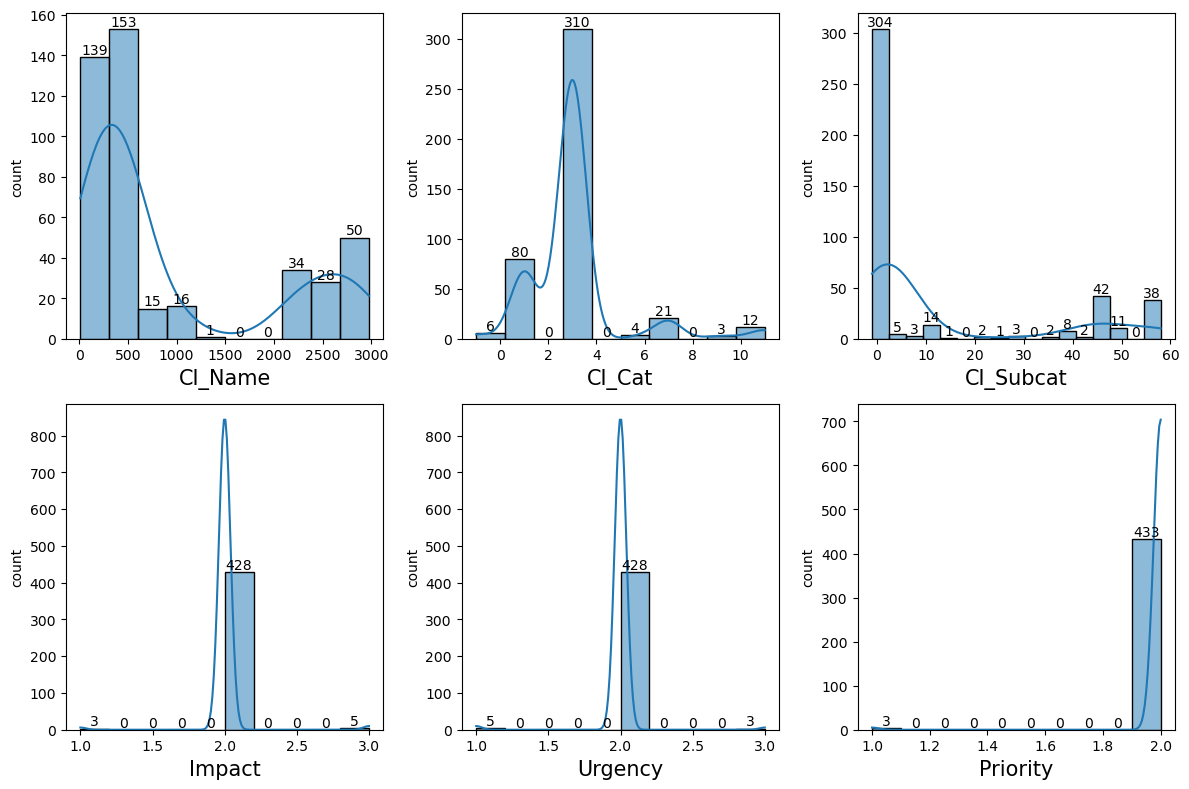

In [29]:
plt.figure(figsize=(12, 8))  # Adjusted figsize to reduce height
plotnumber = 1

for column in data1:
    if plotnumber <= 6:
        ax = plt.subplot(2, 3, plotnumber)
        count = sns.histplot(x=data1[column], kde=True)
        for bars in count.containers:
            count.bar_label(bars)
        plt.xlabel(column, fontsize=15)
        plt.ylabel("count")
    plotnumber += 1

plt.tight_layout()
plt.show()


Insights - Impact, Urgency and Priority most of the data falls under Class 2

# Bivariate Analysis

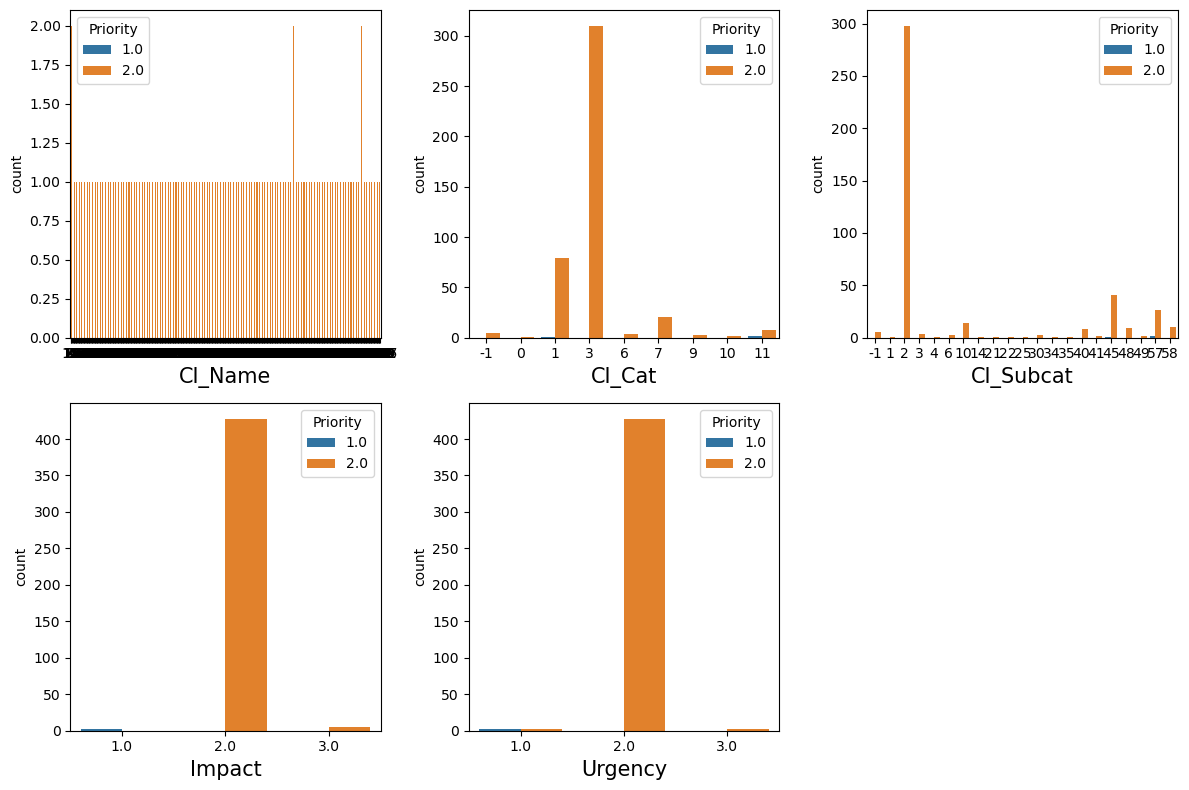

In [30]:
plt.figure(figsize=(12,8))
plotnumber=1

for column in data1:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.countplot(x=data1[column],hue='Priority',data=data1)
        plt.xlabel(column,fontsize=15)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

Insights - It is a highly imbalanced data as most of the data falls under Class2

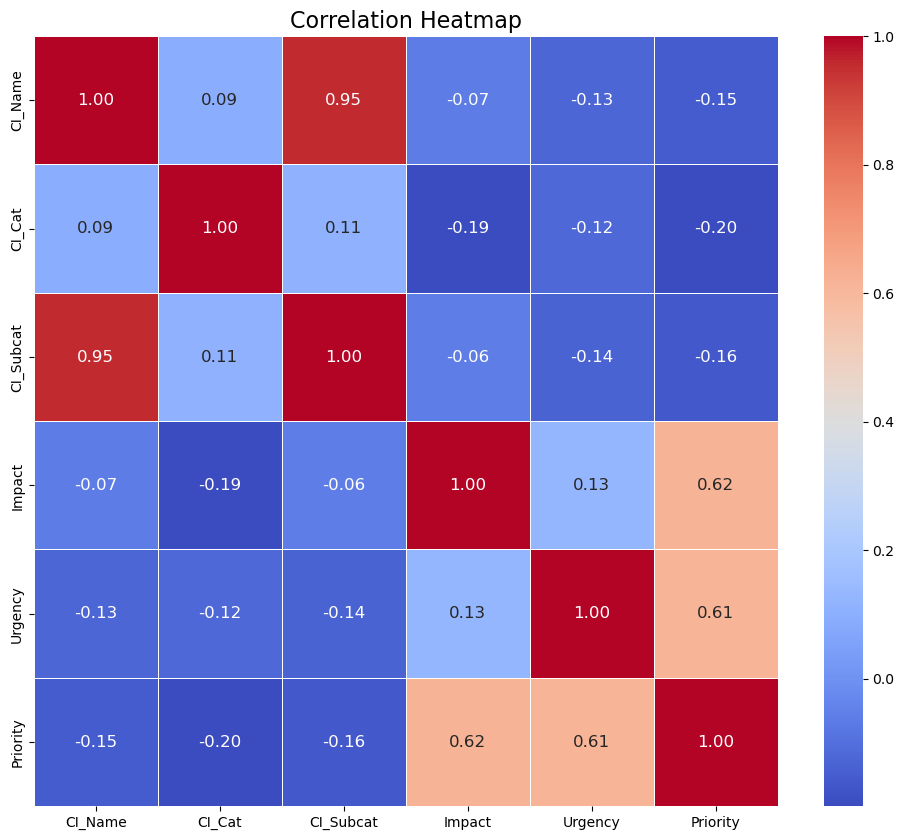

In [31]:
# Calculate the correlation matrix
correlation_matrix = data1.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjusted figsize
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5,
            annot_kws={"size": 12})  # Adjusted font size
plt.title('Correlation Heatmap', fontsize=16)  # Adjusted title font size
plt.show()

High Co-relation between Cl_Name and Cl-Subcat we will remove Cl-Subcat from dataframe

In [32]:
data1 = data1.drop('CI_Subcat', axis=1)

In [33]:
data1.columns

Index(['CI_Name', 'CI_Cat', 'Impact', 'Urgency', 'Priority'], dtype='object')

In [34]:
# Filtering data fo Priority 1 and 2 only
data1 = data1[data1['Priority'].isin([1, 2])]

In [35]:
data1.shape

(436, 5)

In [36]:
data1.head()

CI_Name  CI_Cat  Impact  Urgency  Priority
849      2881       3     2.0      2.0       2.0
1126     2863       1     2.0      2.0       2.0
1128     2150      -1     2.0      2.0       2.0
1185      512       3     2.0      2.0       2.0
1186      511       3     2.0      2.0       2.0

# Outlier check

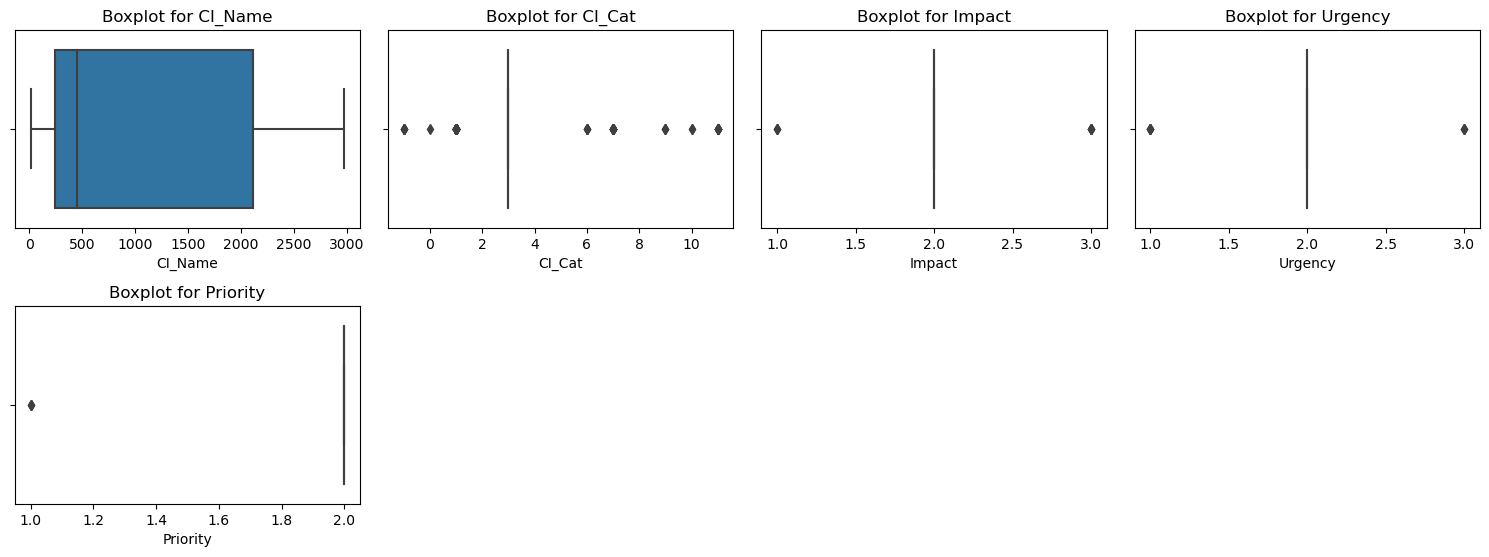

In [37]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Iterate through each column and create box plots
for i, column in enumerate(data1.columns, 1):
    plt.subplot(3, 4, i)  # Adjust the subplot layout based on the number of columns
    sns.boxplot(x=data1[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

As per above chart, did not see any extreme outliers, so wil scale the data few columns before model building 

In [38]:
data1.columns

Index(['CI_Name', 'CI_Cat', 'Impact', 'Urgency', 'Priority'], dtype='object')

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['CI_Name', 'CI_Cat']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to selected columns
scaled_columns = scaler.fit_transform(data1[columns_to_scale])

# Replace original columns with scaled columns
for i, column in enumerate(columns_to_scale):
    data1[column + '_Scaled'] = scaled_columns[:, i]

# Drop the original columns
data1.drop(columns=columns_to_scale, inplace=True)



In [40]:
data1.head()

Impact  Urgency  Priority  CI_Name_Scaled  CI_Cat_Scaled
849      2.0      2.0       2.0        0.968286       0.333333
1126     2.0      2.0       2.0        0.962213       0.166667
1128     2.0      2.0       2.0        0.721660       0.000000
1185     2.0      2.0       2.0        0.169028       0.333333
1186     2.0      2.0       2.0        0.168691       0.333333

# Checking balance of the dataset

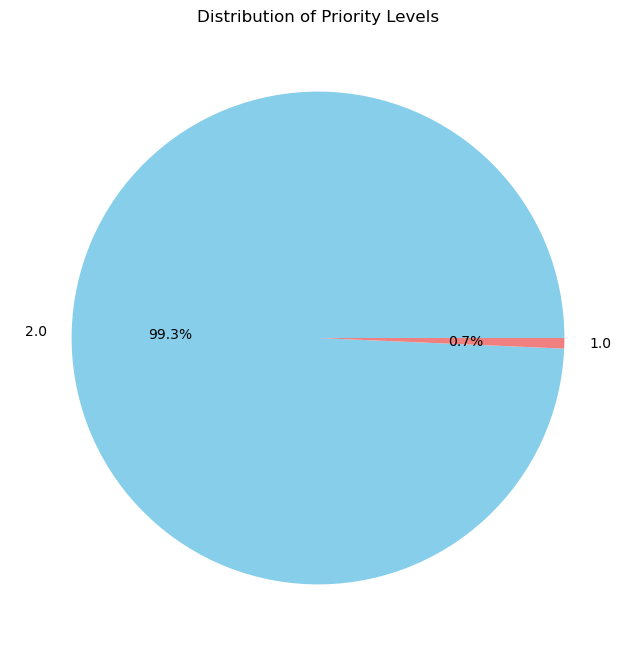

In [41]:
import matplotlib.pyplot as plt

# Assuming 'data2' is your DataFrame and 'Priority' is the target variable
# Replace this with your actual data
price_range_counts = data1['Priority'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Distribution of Priority Levels')
plt.show()

It is a highly imblanced dataset, will use SMOTE to balance this dataset

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [43]:
X = data1.drop('Priority', axis=1)
y = data1['Priority']

In [44]:
#split the dataset
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)
 #Apply SMOTE to the training data only
smote = SMOTE(k_neighbors=1, random_state=42)  # For older versions, use k_neighbors instead of n_neighbors
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


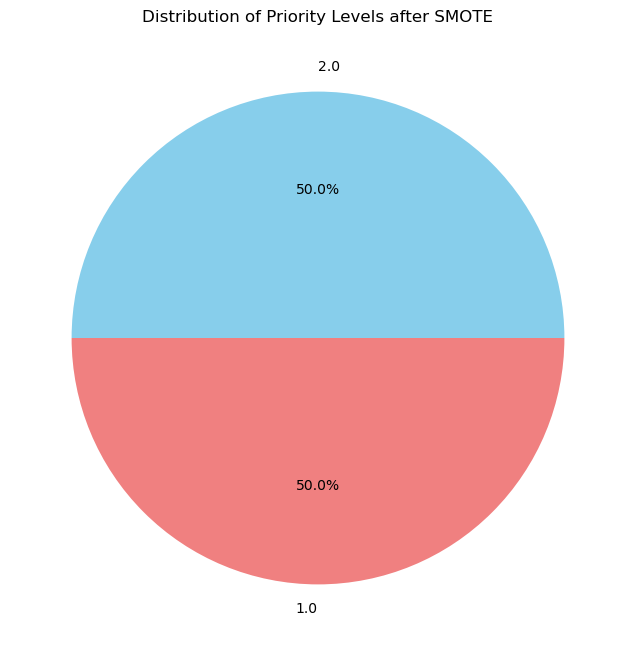

In [46]:
# Visualize the distribution of 'Priority' after SMOTE
plt.figure(figsize=(8, 8))
plt.pie(y_train_resampled.value_counts(), labels=y_train_resampled.value_counts().index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Distribution of Priority Levels after SMOTE')
plt.show()

# Model building  1-  Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logreg_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the training set
y_train_pred = logreg_model.predict(X_train_resampled)

# Predictions on the testing set
y_test_pred = logreg_model.predict(X_test)

# Evaluate the model on training data
training_accuracy = accuracy_score(y_train_resampled, y_train_pred)
training_conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)

# Evaluate the model on testing data
testing_accuracy = accuracy_score(y_test, y_test_pred)
testing_conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Display evaluation metrics
print("Training Accuracy: {:.4f}".format(training_accuracy))
print("\nTraining Confusion Matrix:")
print(training_conf_matrix)
print("\nTesting Accuracy: {:.4f}".format(testing_accuracy))
print("\nTesting Confusion Matrix:")
print(testing_conf_matrix)
print("\nClassification Report:")
print(class_report)


Training Accuracy: 1.0000

Training Confusion Matrix:
[[345   0]
 [  0 345]]

Testing Accuracy: 1.0000

Testing Confusion Matrix:
[[88]]

Classification Report:
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        88

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



# Model 2 - Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the training set
y_train_pred_rf = rf_model.predict(X_train_resampled)

# Predictions on the testing set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model on training data
training_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
training_conf_matrix_rf = confusion_matrix(y_train_resampled, y_train_pred_rf)

# Evaluate the model on testing data
testing_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
testing_conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
class_report_rf = classification_report(y_test, y_test_pred_rf)

# Display evaluation metrics for Random Forest
print("Random Forest - Training Accuracy: {:.4f}".format(training_accuracy_rf))
print("\nRandom Forest - Training Confusion Matrix:")
print(training_conf_matrix_rf)
print("\nRandom Forest - Testing Accuracy: {:.4f}".format(testing_accuracy_rf))
print("\nRandom Forest - Testing Confusion Matrix:")
print(testing_conf_matrix_rf)
print("\nRandom Forest - Classification Report:")
print(class_report_rf)


Random Forest - Training Accuracy: 1.0000

Random Forest - Training Confusion Matrix:
[[345   0]
 [  0 345]]

Random Forest - Testing Accuracy: 1.0000

Random Forest - Testing Confusion Matrix:
[[88]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        88

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



# Model 3 - Random Forest Hyper Parameter

In [50]:
# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the resampled training data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Use the best model
best_rf_model = grid_search_rf.best_estimator_

# Predictions on the training set
y_train_pred_rf = best_rf_model.predict(X_train_resampled)

# Predictions on the testing set
y_test_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model on training data
training_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
training_conf_matrix_rf = confusion_matrix(y_train_resampled, y_train_pred_rf)

# Evaluate the model on testing data
testing_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
testing_conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
class_report_rf = classification_report(y_test, y_test_pred_rf)

# Display evaluation metrics for Random Forest
print("Best Parameters for Random Forest:", best_params_rf)
print("\nRandom Forest - Training Accuracy: {:.4f}".format(training_accuracy_rf))
print("\nRandom Forest - Training Confusion Matrix:")
print(training_conf_matrix_rf)
print("\nRandom Forest - Testing Accuracy: {:.4f}".format(testing_accuracy_rf))
print("\nRandom Forest - Testing Confusion Matrix:")
print(testing_conf_matrix_rf)
print("\nRandom Forest - Classification Report:")
print(class_report_rf)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Random Forest - Training Accuracy: 1.0000

Random Forest - Training Confusion Matrix:
[[345   0]
 [  0 345]]

Random Forest - Testing Accuracy: 1.0000

Random Forest - Testing Confusion Matrix:
[[88]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        88

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



# Model 4 - SVC Hyper Parameter

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'C': randint(1, 100),            # Regularization parameter
    'gamma': ['scale', 'auto'],      # Kernel coefficient
    'kernel': ['linear', 'rbf'],     # Kernel type
    'class_weight': [None, 'balanced']  # Class weights
}

# Initialize the SVC model
svc_model = SVC(random_state=42)

# Initialize RandomizedSearchCV
random_search_svc = RandomizedSearchCV(estimator=svc_model, param_distributions=param_dist, 
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the resampled training data
random_search_svc.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_svc = random_search_svc.best_params_

# Use the best model
best_svc_model = random_search_svc.best_estimator_

# Predictions on the training set
y_train_pred_svc = best_svc_model.predict(X_train_resampled)

# Predictions on the testing set
y_test_pred_svc = best_svc_model.predict(X_test)

# Evaluate the model on training data
training_accuracy_svc = accuracy_score(y_train_resampled, y_train_pred_svc)
training_conf_matrix_svc = confusion_matrix(y_train_resampled, y_train_pred_svc)

# Evaluate the model on testing data
testing_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
testing_conf_matrix_svc = confusion_matrix(y_test, y_test_pred_svc)
class_report_svc = classification_report(y_test, y_test_pred_svc)

# Display evaluation metrics for SVC
print("Best Parameters for SVC:", best_params_svc)
print("\nSVC - Training Accuracy: {:.4f}".format(training_accuracy_svc))
print("\nSVC - Training Confusion Matrix:")
print(training_conf_matrix_svc)
print("\nSVC - Testing Accuracy: {:.4f}".format(testing_accuracy_svc))
print("\nSVC - Testing Confusion Matrix:")
print(testing_conf_matrix_svc)
print("\nSVC - Classification Report:")
print(class_report_svc)


Best Parameters for SVC: {'C': 52, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}

SVC - Training Accuracy: 1.0000

SVC - Training Confusion Matrix:
[[345   0]
 [  0 345]]

SVC - Testing Accuracy: 1.0000

SVC - Testing Confusion Matrix:
[[88]]

SVC - Classification Report:
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        88

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



# Model 5 - SVC

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVC model with default hyperparameters
svc_model = SVC()

# Fit the model on the resampled training data
svc_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the training set
y_train_pred_svc = svc_model.predict(X_train_resampled)

# Predictions on the testing set
y_test_pred_svc = svc_model.predict(X_test)

# Evaluate the model on training data
training_accuracy_svc = accuracy_score(y_train_resampled, y_train_pred_svc)
training_conf_matrix_svc = confusion_matrix(y_train_resampled, y_train_pred_svc)

# Evaluate the model on testing data
testing_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
testing_conf_matrix_svc = confusion_matrix(y_test, y_test_pred_svc)
class_report_svc = classification_report(y_test, y_test_pred_svc)

# Display evaluation metrics for SVC
print("SVC - Training Accuracy: {:.4f}".format(training_accuracy_svc))
print("\nSVC - Training Confusion Matrix:")
print(training_conf_matrix_svc)
print("\nSVC - Testing Accuracy: {:.4f}".format(testing_accuracy_svc))
print("\nSVC - Testing Confusion Matrix:")
print(testing_conf_matrix_svc)
print("\nSVC - Classification Report:")
print(class_report_svc)


SVC - Training Accuracy: 1.0000

SVC - Training Confusion Matrix:
[[345   0]
 [  0 345]]

SVC - Testing Accuracy: 1.0000

SVC - Testing Confusion Matrix:
[[88]]

SVC - Classification Report:
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        88

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



# Learning curve

Training Accuracy: 1.0
Testing Accuracy: 0.9


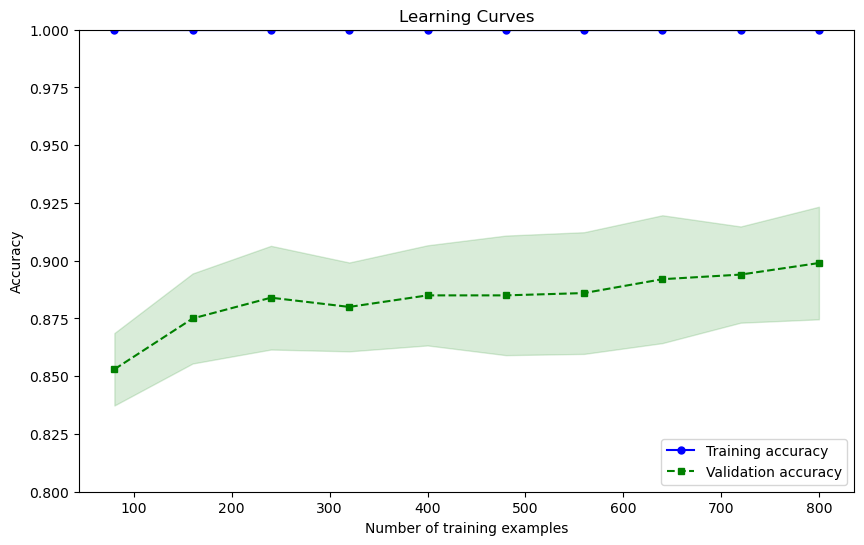

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Predictions on the testing set
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy on training and testing sets
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

# Learning curves
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.title('Learning Curves')
plt.show()


# We have built the model based on oversampling data, however all models are overfitting as training and test accuracy is 100%- Will try UnderSampling

# Undersampling method

# Model 1 - Random Forest

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, X_test, y_train, y_test are your original training and testing data

# Initialize RandomUnderSampler to balance the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the training set
y_train_pred_rf = rf_model.predict(X_train_resampled)

# Predictions on the testing set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model on training data
training_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
training_conf_matrix_rf = confusion_matrix(y_train_resampled, y_train_pred_rf)

# Evaluate the model on testing data
testing_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
testing_conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
class_report_rf = classification_report(y_test, y_test_pred_rf)

# Display evaluation metrics for Random Forest
print("Random Forest - Training Accuracy: {:.4f}".format(training_accuracy_rf))
print("\nRandom Forest - Training Confusion Matrix:")
print(training_conf_matrix_rf)
print("\nRandom Forest - Testing Accuracy: {:.4f}".format(testing_accuracy_rf))
print("\nRandom Forest - Testing Confusion Matrix:")
print(testing_conf_matrix_rf)
print("\nRandom Forest - Classification Report:")
print(class_report_rf)


Random Forest - Training Accuracy: 1.0000

Random Forest - Training Confusion Matrix:
[[393   0]
 [  0 393]]

Random Forest - Testing Accuracy: 0.8900

Random Forest - Testing Confusion Matrix:
[[85  8]
 [14 93]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        93
           1       0.92      0.87      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



# Model 2 - Random Forest - Hyper Parameter tuned

In [55]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize RandomUnderSampler to balance the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the resampled training data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Use the best model
best_rf_model = grid_search_rf.best_estimator_

# Predictions on the training set
y_train_pred_rf = best_rf_model.predict(X_train_resampled)

# Predictions on the testing set
y_test_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on training data
training_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
training_conf_matrix_rf = confusion_matrix(y_train_resampled, y_train_pred_rf)

# Evaluate the best model on testing data
testing_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
testing_conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
class_report_rf = classification_report(y_test, y_test_pred_rf)

# Display evaluation metrics for Random Forest
print("Best Parameters for Random Forest:", best_params_rf)
print("\nRandom Forest - Training Accuracy: {:.4f}".format(training_accuracy_rf))
print("\nRandom Forest - Testing Accuracy: {:.4f}".format(testing_accuracy_rf))
print("\nRandom Forest - Training Confusion Matrix:")
print(training_conf_matrix_rf)
print("\nRandom Forest - Testing Confusion Matrix:")
print(testing_conf_matrix_rf)
print("\nRandom Forest - Classification Report:")
print(class_report_rf)


Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Random Forest - Training Accuracy: 0.9885

Random Forest - Testing Accuracy: 0.8850

Random Forest - Training Confusion Matrix:
[[390   3]
 [  6 387]]

Random Forest - Testing Confusion Matrix:
[[85  8]
 [15 92]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        93
           1       0.92      0.86      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



# Model 3 - SVC Hyper parameter tuned

In [56]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize RandomUnderSampler to balance the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize SVC
svc_model = SVC()

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the resampled training data
grid_search_svc.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_svc = grid_search_svc.best_params_

# Use the best model
best_svc_model = grid_search_svc.best_estimator_

# Predictions on the training set
y_train_pred_svc = best_svc_model.predict(X_train_resampled)

# Predictions on the testing set
y_test_pred_svc = best_svc_model.predict(X_test)

# Evaluate the best model on training data
training_accuracy_svc = accuracy_score(y_train_resampled, y_train_pred_svc)
training_conf_matrix_svc = confusion_matrix(y_train_resampled, y_train_pred_svc)

# Evaluate the best model on testing data
testing_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
testing_conf_matrix_svc = confusion_matrix(y_test, y_test_pred_svc)
class_report_svc = classification_report(y_test, y_test_pred_svc)

# Display evaluation metrics for SVC
print("Best Parameters for SVC:", best_params_svc)
print("\nSVC - Training Accuracy: {:.4f}".format(training_accuracy_svc))
print("\nSVC - Testing Accuracy: {:.4f}".format(testing_accuracy_svc))
print("\nSVC - Training Confusion Matrix:")
print(training_conf_matrix_svc)
print("\nSVC - Testing Confusion Matrix:")
print(testing_conf_matrix_svc)
print("\nSVC - Classification Report:")
print(class_report_svc)


Best Parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

SVC - Training Accuracy: 0.8728

SVC - Testing Accuracy: 0.8700

SVC - Training Confusion Matrix:
[[353  40]
 [ 60 333]]

SVC - Testing Confusion Matrix:
[[87  6]
 [20 87]]

SVC - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        93
           1       0.94      0.81      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



# XGB with Hyper parameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize RandomUnderSampler to balance the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the resampled training data
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Get the training score
training_score_xgb = grid_search_xgb.best_score_

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_

# Use the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Predictions on the testing set
y_test_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model on testing data
testing_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
testing_conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
class_report_xgb = classification_report(y_test, y_test_pred_xgb)

# Display evaluation metrics for XGBoost
print("Best Parameters for XGBoost:", best_params_xgb)
print("\nXGBoost - Training Accuracy: {:.4f}".format(training_score_xgb))
print("\nXGBoost - Testing Accuracy: {:.4f}".format(testing_accuracy_xgb))
print("\nXGBoost - Testing Confusion Matrix:")
print(testing_conf_matrix_xgb)
print("\nXGBoost - Classification Report:")
print(class_report_xgb)


Best Parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}

XGBoost - Training Accuracy: 0.9173

XGBoost - Testing Accuracy: 0.9000

XGBoost - Testing Confusion Matrix:
[[88  5]
 [15 92]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



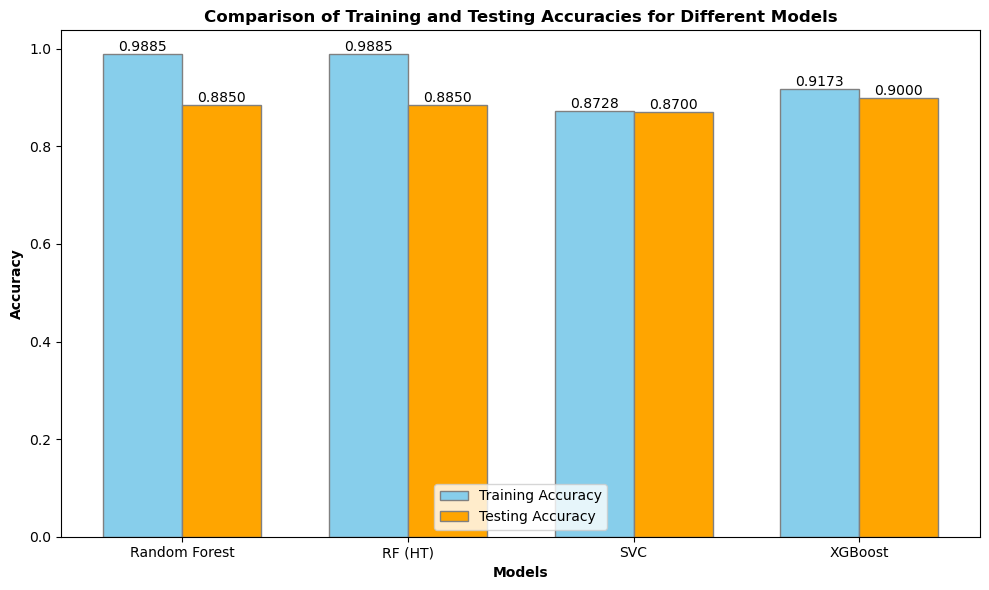

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['Random Forest', 'RF (HT)', 'SVC', 'XGBoost']

# Training accuracies
training_accuracies = [0.9885, 0.9885, 0.8728, 0.9173]

# Testing accuracies
testing_accuracies = [0.8850, 0.8850, 0.8700, 0.9000]

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, training_accuracies, color='skyblue', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, testing_accuracies, color='orange', width=bar_width, edgecolor='grey', label='Testing Accuracy')

# Adding data labels
for i in range(len(models)):
    plt.text(r1[i], training_accuracies[i], f'{training_accuracies[i]:.4f}', ha='center', va='bottom')
    plt.text(r2[i], testing_accuracies[i], f'{testing_accuracies[i]:.4f}', ha='center', va='bottom')

# Adding titles and labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Comparison of Training and Testing Accuracies for Different Models', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)
plt.legend(loc='lower center')

# Show plot
plt.tight_layout()
plt.show()


# Comparison Summary

All models demonstrate good performance with accuracy above 0.87.
XGBoost outperforms other models slightly with the highest accuracy of 0.90.
Random Forest models and SVC show similar performance with accuracy around 0.89 and 0.87, respectively.
XGBoost has slightly better precision, recall, and F1-score compared to RF and SVC, indicating better overall performance.
Random Forest models, with and without hyperparameter tuning, show similar performance, suggesting that the default hyperparameters might suffice for this dataset.
SVC has slightly lower accuracy compared to RF and XGBoost, indicating that it may not be the best choice for this dataset.

# Final Summary - Predicting High Priority Tickets 

**XGBoost** appears to be the most suitable model for this dataset, considering its highest accuracy and balanced performance across all metrics.
If computational resources are limited, Random Forest can be a good alternative, especially considering its simplicity and comparable performance.
SVC, while providing decent performance, may not be the optimal choice given its slightly lower accuracy compared to other models.

# Auto Tag Tickets

Auto Tag ticket similar to above project, however in the above project we have classified only class 1 and 2, however in this scenario we create the model to auto tag tickets for all classes. Data is already formatted

In [59]:
# Columns to select
columns_to_select = ['CI_Name', 'CI_Cat', 'CI_Subcat', 'Impact', 'Urgency', 'Priority']

# Creating data1 DataFrame with selected columns
data2 = data[columns_to_select].copy()

In [60]:
data2.shape

(46606, 6)

In [61]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CI_Name    46606 non-null  int16  
 1   CI_Cat     46606 non-null  int8   
 2   CI_Subcat  46606 non-null  int8   
 3   Impact     46606 non-null  float64
 4   Urgency    46605 non-null  float64
 5   Priority   46606 non-null  float64
dtypes: float64(3), int16(1), int8(2)
memory usage: 1.2 MB


Remove null value from Urgency

In [62]:
data2.dropna(subset=['Urgency'], inplace=True)

In [63]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 0 to 46605
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CI_Name    46605 non-null  int16  
 1   CI_Cat     46605 non-null  int8   
 2   CI_Subcat  46605 non-null  int8   
 3   Impact     46605 non-null  float64
 4   Urgency    46605 non-null  float64
 5   Priority   46605 non-null  float64
dtypes: float64(3), int16(1), int8(2)
memory usage: 1.6 MB


In [64]:
data2.duplicated().sum()

42351

Many duplicate values found

In [65]:
data2.drop_duplicates(inplace=True)

In [66]:
data2.duplicated().sum()

0

In [67]:
data2.shape

(4254, 6)

In [68]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4254 entries, 0 to 46492
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CI_Name    4254 non-null   int16  
 1   CI_Cat     4254 non-null   int8   
 2   CI_Subcat  4254 non-null   int8   
 3   Impact     4254 non-null   float64
 4   Urgency    4254 non-null   float64
 5   Priority   4254 non-null   float64
dtypes: float64(3), int16(1), int8(2)
memory usage: 149.6 KB


We have already checked this data Univarite and Bi variate analysis, we are checking the balance of the dataset

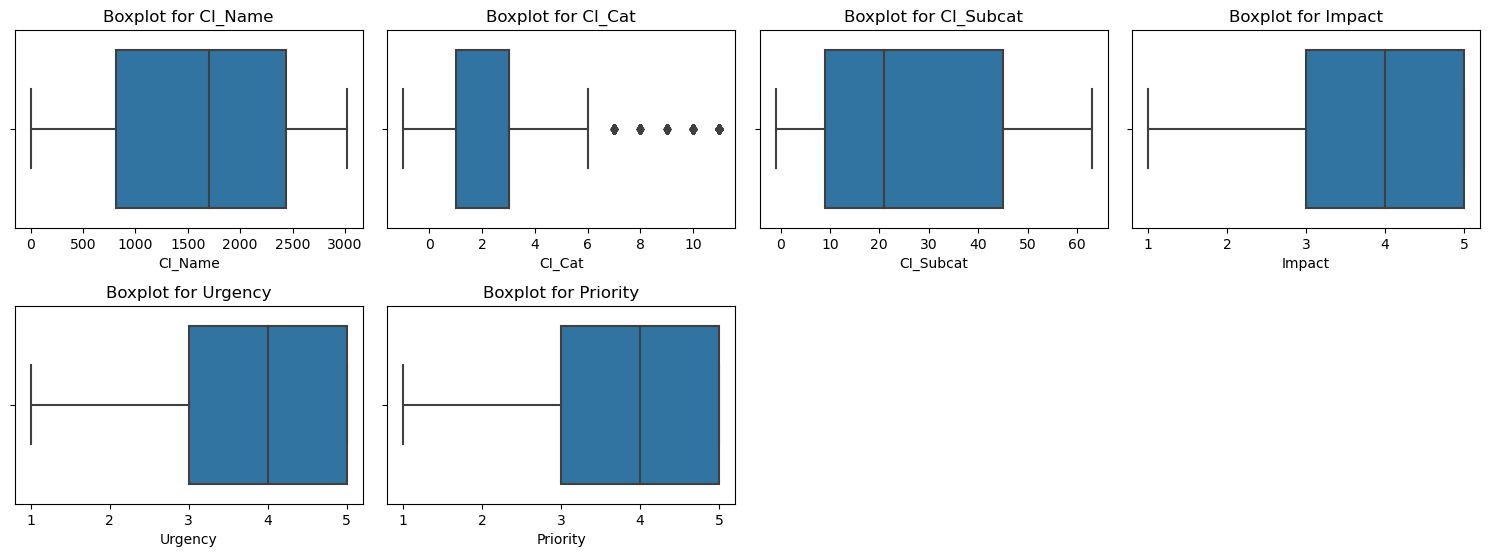

In [69]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Iterate through each column and create box plots
for i, column in enumerate(data2.columns, 1):
    plt.subplot(3, 4, i)  # Adjust the subplot layout based on the number of columns
    sns.boxplot(x=data2[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

Outlier is ok

In [70]:
# Removing data2.drop CI_Subcat as it has high co-relatio
data2.drop(columns=['CI_Subcat'], inplace=True)

In [71]:
data2.head()

CI_Name  CI_Cat  Impact  Urgency  Priority
0     2741      11     4.0      4.0       4.0
1     2863       1     3.0      3.0       3.0
2      990       1     4.0      3.0       4.0
3     2863       1     4.0      4.0       4.0
6     2841       1     4.0      4.0       4.0

In [72]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['CI_Name', 'CI_Cat']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to selected columns
scaled_columns = scaler.fit_transform(data2[columns_to_scale])

# Replace original columns with scaled columns
for i, column in enumerate(columns_to_scale):
    data2[column + '_Scaled'] = scaled_columns[:, i]

# Drop the original columns
data2.drop(columns=columns_to_scale, inplace=True)



In [73]:
data2.head()

Impact  Urgency  Priority  CI_Name_Scaled  CI_Cat_Scaled
0     4.0      4.0       4.0        0.908217       1.000000
1     3.0      3.0       3.0        0.948641       0.166667
2     4.0      3.0       4.0        0.328032       0.166667
3     4.0      4.0       4.0        0.948641       0.166667
6     4.0      4.0       4.0        0.941352       0.166667

Checking the balance of the dataset

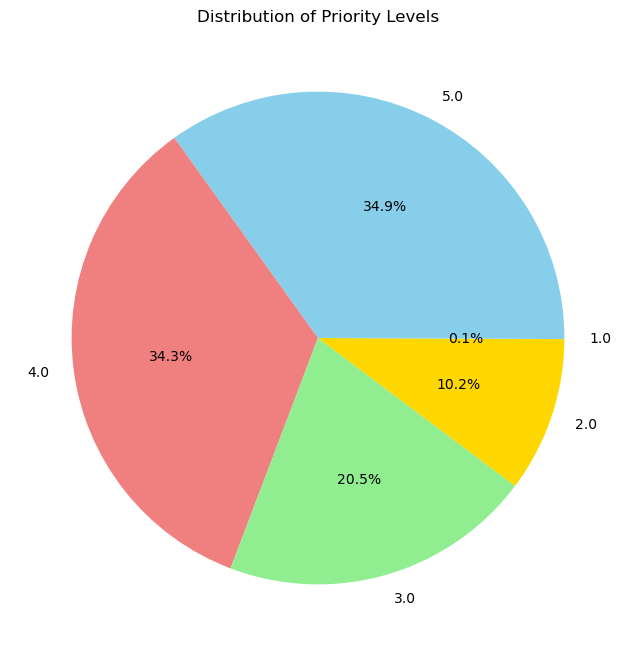

In [74]:
import matplotlib.pyplot as plt

# Assuming 'data2' is your DataFrame and 'Priority' is the target variable
# Replace this with your actual data
price_range_counts = data2['Priority'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Distribution of Priority Levels')
plt.show()

# Model building - Will use SMOTE and Build the model
# 1) Logistic regression

In [75]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming data2 is your DataFrame and 'Priority' is the column representing classes

# Separate features and target variable
X = data2.drop(columns=['Priority'])
y = data2['Priority']

# Define the oversampling strategy
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = logistic_regression.predict(X_train)

# Compute training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)

# Make predictions on the test set
test_predictions = logistic_regression.predict(X_test)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9873737373737373
Test Accuracy: 0.9892255892255892


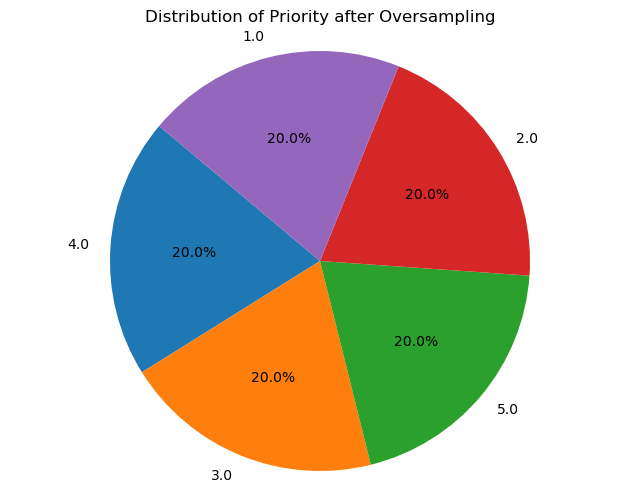

Record counts after Oversampling:
4.0    1485
3.0    1485
5.0    1485
2.0    1485
1.0    1485
Name: Priority, dtype: int64


In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_resampled to a DataFrame
y_resampled_df = pd.DataFrame({'Priority': y_resampled})

# Count the occurrences of each class
class_counts = y_resampled_df['Priority'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Priority after Oversampling')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print record counts for each class
print("Record counts after Oversampling:")
print(class_counts)

# Final Summary - Auto tag tickets

**The logistic regression model** exhibits impressive performance with a training accuracy of **98.74%** and a test accuracy of **98.92%**. These high accuracies suggest robust predictive capability and strong generalization to unseen data. Further model evaluation could involve exploring additional metrics such as precision, recall, and F1-score. However, the current results demonstrate the efficacy of logistic regression for the given task. Future work might consider comparing the logistic regression model with alternative classifiers to assess whether further improvements in performance can be achieved. Nonetheless, the model's strong performance on both training and test datasets underscores its suitability for the task at hand

# RFC

In [77]:
df = pd.read_csv(r"C:\Users\91961\Downloads\Data_dia.csv")

In [78]:
df.head()

CI_Name          CI_Cat              CI_Subcat        WBS Incident_ID  \
0  SUB000508  subapplication  Web Based Application  WBS000162   IM0000004   
1  WBA000124     application  Web Based Application  WBS000088   IM0000005   
2  DTA000024     application    Desktop Application  WBS000092   IM0000006   
3  WBA000124     application  Web Based Application  WBS000088   IM0000011   
4  WBA000124     application  Web Based Application  WBS000088   IM0000012   

   Status Impact Urgency  Priority  number_cnt  ...       Reopen_Time  \
0  Closed      4       4       4.0    0.601292  ...               NaN   
1  Closed      3       3       3.0    0.415050  ...  02-12-2013 12:31   
2  Closed     NS       3       NaN    0.517551  ...               NaN   
3  Closed      4       4       4.0    0.642927  ...               NaN   
4  Closed      4       4       4.0    0.345258  ...               NaN   

      Resolved_Time        Close_Time  Handle_Time_hrs  \
0  04-11-2013 13:50  04-11-2013 13:51   3,87,16,91,111   
1  02-12-2013 12:36  02-12-2013 12:36   4,35,47,86,389   
2  13-01-2014 15:12  13-01-2014 15:13   4,84,31,19,444   
3  14-11-2013 09:31  14-11-2013 09:31   4,32,18,33,333   
4  08-11-2013 13:55  08-11-2013 13:55   3,38,39,03,333   

                   Closure_Code No_of_Related_Interactions  \
0                         Other                        1.0   
1                      Software                        1.0   
2  No error - works as designed                        1.0   
3                Operator error                        1.0   
4                         Other                        1.0   

  Related_Interaction No_of_Related_Incidents No_of_Related_Changes  \
0           SD0000007                     2.0                   NaN   
1           SD0000011                     1.0                   NaN   
2           SD0000017                     NaN                   NaN   
3           SD0000025                     NaN                   NaN   
4           SD0000029                     NaN                   NaN   

  Related_Change  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 25 columns]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

# Object to Numeric

In [80]:
 #List of columns to convert from categorical to numeric
columns_to_convert = ['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
                       'Category', 'KB_number', 'Alert_Status', 'Closure_Code',
                       'Related_Interaction']
# Convert categorical values to numeric using cat.codes
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.astype('category').cat.codes)

In [81]:
# List of date columns to convert to datetime
date_columns = ['Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time']

# Convert date columns to datetime
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')

In [82]:

# List of columns to convert from object to numeric
columns_to_convert = ['Impact', 'Urgency','No_of_Related_Interactions','Related_Change']

# Convert the specified columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [83]:
columns_to_convert = ['Handle_Time_hrs']
# Convert categorical values to numeric using cat.codes
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.astype('category').cat.codes)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  int16         
 1   CI_Cat                      46606 non-null  int8          
 2   CI_Subcat                   46606 non-null  int8          
 3   WBS                         46606 non-null  int16         
 4   Incident_ID                 46606 non-null  int32         
 5   Status                      46606 non-null  int8          
 6   Impact                      45226 non-null  float64       
 7   Urgency                     46605 non-null  float64       
 8   Priority                    45226 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  int8          
 11  KB_number                   46606 non-null  int16     

# Rename column

In [85]:
# Assuming 'data' is your DataFrame and 'No_of_Related_Changes' is the column name you want to change
df.rename(columns={'No_of_Related_Changes': 'RFC'}, inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  int16         
 1   CI_Cat                      46606 non-null  int8          
 2   CI_Subcat                   46606 non-null  int8          
 3   WBS                         46606 non-null  int16         
 4   Incident_ID                 46606 non-null  int32         
 5   Status                      46606 non-null  int8          
 6   Impact                      45226 non-null  float64       
 7   Urgency                     46605 non-null  float64       
 8   Priority                    45226 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  int8          
 11  KB_number                   46606 non-null  int16     

# Droping Null Values from RFC 

In [87]:
df.dropna(subset=['RFC'], inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 10 to 46416
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     560 non-null    int16         
 1   CI_Cat                      560 non-null    int8          
 2   CI_Subcat                   560 non-null    int8          
 3   WBS                         560 non-null    int16         
 4   Incident_ID                 560 non-null    int32         
 5   Status                      560 non-null    int8          
 6   Impact                      525 non-null    float64       
 7   Urgency                     560 non-null    float64       
 8   Priority                    525 non-null    float64       
 9   number_cnt                  560 non-null    float64       
 10  Category                    560 non-null    int8          
 11  KB_number                   560 non-null    int16      

In [89]:
df['RFC'].value_counts()

1.0    536
2.0     21
3.0      2
9.0      1
Name: RFC, dtype: int64

# Replace Null values

In [90]:
df['Priority'].fillna(df['Priority'].mode()[0],inplace=True)
df['Impact'].fillna(df['Impact'].mode()[0],inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 10 to 46416
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     560 non-null    int16         
 1   CI_Cat                      560 non-null    int8          
 2   CI_Subcat                   560 non-null    int8          
 3   WBS                         560 non-null    int16         
 4   Incident_ID                 560 non-null    int32         
 5   Status                      560 non-null    int8          
 6   Impact                      560 non-null    float64       
 7   Urgency                     560 non-null    float64       
 8   Priority                    560 non-null    float64       
 9   number_cnt                  560 non-null    float64       
 10  Category                    560 non-null    int8          
 11  KB_number                   560 non-null    int16      

# Feature Selection

In [92]:
df.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'RFC', 'Related_Change'],
      dtype='object')

In [93]:
data3 = df[['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments','No_of_Related_Interactions', 'Related_Interaction','RFC']]

In [94]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 10 to 46416
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     560 non-null    int16  
 1   CI_Cat                      560 non-null    int8   
 2   CI_Subcat                   560 non-null    int8   
 3   WBS                         560 non-null    int16  
 4   Incident_ID                 560 non-null    int32  
 5   Status                      560 non-null    int8   
 6   Impact                      560 non-null    float64
 7   Urgency                     560 non-null    float64
 8   Priority                    560 non-null    float64
 9   number_cnt                  560 non-null    float64
 10  Category                    560 non-null    int8   
 11  KB_number                   560 non-null    int16  
 12  Alert_Status                560 non-null    int8   
 13  No_of_Reassignments         560 

In [95]:
data3.describe().T

count          mean           std        min  \
CI_Name                     560.0   2273.916071    804.099008   7.000000   
CI_Cat                      560.0      3.248214      4.021520  -1.000000   
CI_Subcat                   560.0     42.787500     18.180260  -1.000000   
WBS                         560.0     98.903571     66.693044   1.000000   
Incident_ID                 560.0  20633.930357  13231.339919  10.000000   
Status                      560.0      0.000000      0.000000   0.000000   
Impact                      560.0      3.935714      0.781821   1.000000   
Urgency                     560.0      3.869643      0.821757   1.000000   
Priority                    560.0      3.926786      0.784463   1.000000   
number_cnt                  560.0      0.499925      0.288753   0.002578   
Category                    560.0      1.103571      0.443584   1.000000   
KB_number                   560.0    793.126786    497.726696  17.000000   
Alert_Status                560.0      0.000000      0.000000   0.000000   
No_of_Reassignments         560.0      1.225000      2.958766   0.000000   
No_of_Related_Interactions  560.0      1.683929      4.360962   1.000000   
Related_Interaction         560.0  17168.407143  12753.785523   0.000000   
RFC                         560.0      1.058929      0.403596   1.000000   

                                     25%           50%           75%  \
CI_Name                      2338.500000   2610.000000   2818.000000   
CI_Cat                          1.000000      1.000000      3.000000   
CI_Subcat                      45.000000     45.000000     57.000000   
WBS                            59.000000     71.000000    137.000000   
Incident_ID                 10656.750000  18073.500000  35791.500000   
Status                          0.000000      0.000000      0.000000   
Impact                          4.000000      4.000000      4.000000   
Urgency                         3.000000      4.000000      4.000000   
Priority                        4.000000      4.000000      4.000000   
number_cnt                      0.233672      0.513036      0.746742   
Category                        1.000000      1.000000      1.000000   
KB_number                     413.000000    751.000000   1143.000000   
Alert_Status                    0.000000      0.000000      0.000000   
No_of_Reassignments             0.000000      0.000000      1.000000   
No_of_Related_Interactions      1.000000      1.000000      1.000000   
Related_Interaction          9256.500000  12922.000000  30649.500000   
RFC                             1.000000      1.000000      1.000000   

                                     max  
CI_Name                      2962.000000  
CI_Cat                         11.000000  
CI_Subcat                      58.000000  
WBS                           270.000000  
Incident_ID                 46416.000000  
Status                          0.000000  
Impact                          5.000000  
Urgency                         5.000000  
Priority                        5.000000  
number_cnt                      0.992203  
Category                        3.000000  
KB_number                    1785.000000  
Alert_Status                    0.000000  
No_of_Reassignments            27.000000  
No_of_Related_Interactions     57.000000  
Related_Interaction         42618.000000  
RFC                             9.000000

# Feature Importance to select important predictors

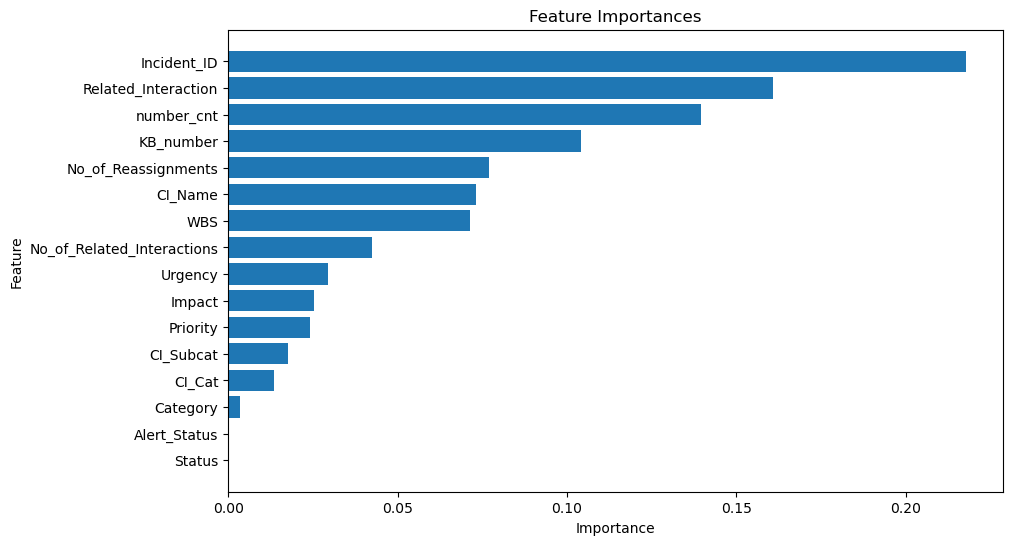

In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'data3' is your DataFrame and 'RFC' is the target column
# Replace 'data3' and 'RFC' with your actual DataFrame and target column name
X = data3.drop('RFC', axis=1)  # Features
y = data3['RFC']                # Target variable

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


As per Above chart, we have only important predictors for model building.

In [97]:
data3 = data3[['CI_Name','CI_Subcat', 'WBS', 'Incident_ID',
       'Impact', 'Urgency', 'Priority', 'number_cnt','KB_number',
       'No_of_Reassignments','No_of_Related_Interactions', 'Related_Interaction','RFC']]

In [98]:
data3.columns

Index(['CI_Name', 'CI_Subcat', 'WBS', 'Incident_ID', 'Impact', 'Urgency',
       'Priority', 'number_cnt', 'KB_number', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'Related_Interaction', 'RFC'],
      dtype='object')

In [99]:
data3.duplicated().sum()

0

No Duplicate values found

Univariate and Bivariate not done as we have done feature importance

# Checking balance of the dataset

In [100]:
class_distribution_percentage = data3['RFC'].value_counts(normalize=True) * 100

print("RFC class distribution (percentage):")
print(class_distribution_percentage)

RFC class distribution (percentage):
1.0    95.714286
2.0     3.750000
3.0     0.357143
9.0     0.178571
Name: RFC, dtype: float64


It is a imbalanced dataset where RFC  **Class 1** has majority of the volume, and other classes 2, 3 and 9 are very minimal. so I have combined class 2, 3 and 9 as RFC 2 to avoid imbalance the dataset

# Merging minority classes, SMOTE and Scaling

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Assuming 'data3' is your DataFrame and 'RFC' is the target column
# Replace 'data3' and 'RFC' with your actual DataFrame and target column name

# Merge classes 3 and 9 into class 2
data3['RFC'] = data3['RFC'].replace({3.0: 2.0, 9.0: 2.0})

# Separate features and target variable
X = data3.drop('RFC', axis=1)  # Features
y = data3['RFC']                # Target variable

# Perform SMOTE to oversample the minority class and balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Perform train-test split on the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)



# Model 1 - Logistic Regression

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Train a Logistic Regression classifier on the scaled resampled training data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on the scaled training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Generate classification reports for training and testing sets
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Calculate confusion matrix, training and testing accuracy
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Classification Report - Training Set:")
print(train_classification_report)
print("\nConfusion Matrix - Training Set:")
print(train_conf_matrix)
print("\nTraining Accuracy:", train_accuracy)
print("\nClassification Report - Testing Set:")
print(test_classification_report)
print("\nConfusion Matrix - Testing Set:")
print(test_conf_matrix)
print("\nTesting Accuracy:", test_accuracy)


Classification Report - Training Set:
              precision    recall  f1-score   support

         1.0       0.65      0.59      0.62       418
         2.0       0.64      0.70      0.67       439

    accuracy                           0.64       857
   macro avg       0.64      0.64      0.64       857
weighted avg       0.64      0.64      0.64       857


Confusion Matrix - Training Set:
[[245 173]
 [133 306]]

Training Accuracy: 0.6429404900816803

Classification Report - Testing Set:
              precision    recall  f1-score   support

         1.0       0.75      0.59      0.66       118
         2.0       0.61      0.76      0.68        97

    accuracy                           0.67       215
   macro avg       0.68      0.68      0.67       215
weighted avg       0.69      0.67      0.67       215


Confusion Matrix - Testing Set:
[[70 48]
 [23 74]]

Testing Accuracy: 0.6697674418604651


# Model 2 - Random Forest Hyper parameter

In [103]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Assuming 'data3' is your DataFrame and 'RFC' is the target column
# Replace 'data3' and 'RFC' with your actual DataFrame and target column name

# Merge classes 3 and 9 into class 2
data3['RFC'] = data3['RFC'].replace({3.0: 2.0, 9.0: 2.0})

# Separate features and target variable
X = data3.drop('RFC', axis=1)  # Features
y = data3['RFC']                # Target variable

# Perform SMOTE to oversample the minority class and balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Perform train-test split on the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_clf = grid_search.best_estimator_

# Train the best model on the entire training data
best_rf_clf.fit(X_train, y_train)

# Predict on the scaled training and testing sets
y_train_pred = best_rf_clf.predict(X_train)
y_test_pred = best_rf_clf.predict(X_test)

# Generate classification reports for training and testing sets
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Generate confusion matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report - Training Set:")
print(train_classification_report)
print("\nConfusion Matrix - Training Set:")
print(train_conf_matrix)
print("\nClassification Report - Testing Set:")
print(test_classification_report)
print("\nConfusion Matrix - Testing Set:")
print(test_conf_matrix)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report - Training Set:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       418
         2.0       1.00      1.00      1.00       439

    accuracy                           1.00       857
   macro avg       1.00      1.00      1.00       857
weighted avg       1.00      1.00      1.00       857


Confusion Matrix - Training Set:
[[418   0]
 [  0 439]]

Classification Report - Testing Set:
              precision    recall  f1-score   support

         1.0       0.99      0.98      0.99       118
         2.0       0.98      0.99      0.98        97

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215


Confusion Matrix - Testing Set:
[[116   2]
 [  1  96]]


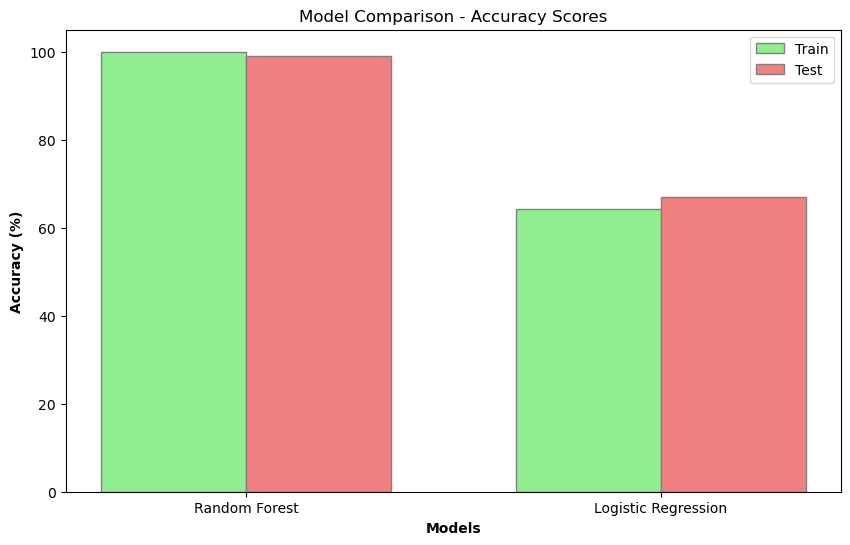

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'Logistic Regression']
train_accuracy = [100.00, 64.29]
test_accuracy = [99.07, 66.98]

# Set the width of the bars
bar_width = 0.35

# Set the position of each bar on the X-axis
r1 = np.arange(len(train_accuracy))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, train_accuracy, color='lightgreen', width=bar_width, edgecolor='grey', label='Train')
plt.bar(r2, test_accuracy, color='lightcoral', width=bar_width, edgecolor='grey', label='Test')

# Adding labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(train_accuracy))], models)
plt.title('Model Comparison - Accuracy Scores')
plt.legend()

# Show plot
plt.show()


## Comparsion Summary

Random Forest outperforms Logistic Regression with significantly higher accuracy on both training and testing sets. Random Forest achieves near-perfect accuracy, while Logistic Regression demonstrates moderate accuracy. Random Forest's ability to capture complex relationships makes it more suitable for the dataset

# Final Summary - RFC

**Random Forest**, after hyperparameter tuning, showcases exceptional performance with near-perfect accuracy on both training and testing sets. Through optimized parameters, it effectively handles complex relationships, ensuring robust predictions. This demonstrates the efficacy of hyperparameter tuning in enhancing Random Forest's predictive capabilities for the given dataset

# Time Series and Forecast

In [105]:
data4 = data[['Open_Time','Incident_ID']]

In [106]:
# Convert 'Open_Time' to datetime format
data4['Open_Time'] = pd.to_datetime(data4['Open_Time'])

# Extract month from 'Open_Time'
data4['Month'] = data4['Open_Time'].dt.to_period('M')

# Group by month and count the number of incidents
monthly_counts = data4.groupby('Month').size().reset_index(name='Incident_Count')

# Display the resulting DataFrame
print(monthly_counts)

      Month  Incident_Count
0   2012-01               1
1   2012-02               1
2   2012-03               2
3   2012-05               2
4   2012-07               2
5   2012-08               3
6   2012-09               1
7   2012-10               6
8   2012-11               1
9   2012-12               2
10  2013-01             764
11  2013-02             828
12  2013-03             869
13  2013-04            1196
14  2013-05             825
15  2013-06             796
16  2013-07             898
17  2013-08             761
18  2013-09            1516
19  2013-10            5803
20  2013-11            6063
21  2013-12            4287
22  2014-01            5763
23  2014-02            4476
24  2014-03            4797
25  2014-04             764
26  2014-05             724
27  2014-06            1155
28  2014-07            1040
29  2014-08             375
30  2014-09             368
31  2014-10            1090
32  2014-11             773
33  2014-12             654


In [107]:
monthly_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Month           34 non-null     period[M]
 1   Incident_Count  34 non-null     int64    
dtypes: int64(1), period[M](1)
memory usage: 676.0 bytes


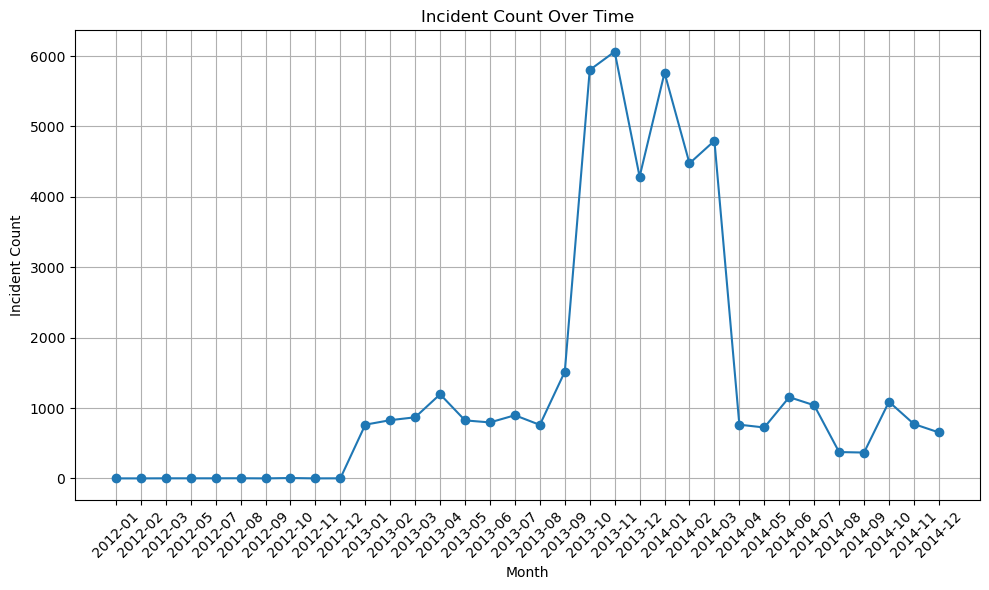

In [108]:
# Convert 'Month' to string for plotting
monthly_counts['Month'] = monthly_counts['Month'].astype(str)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts['Month'], monthly_counts['Incident_Count'], marker='o')
plt.title('Incident Count Over Time')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


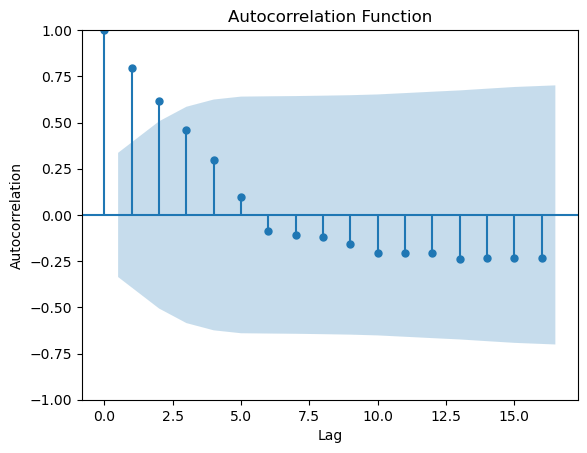

In [109]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming your data is stored in the 'Incident_Count' column of the 'monthly_counts' DataFrame
plot_acf(monthly_counts['Incident_Count'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()


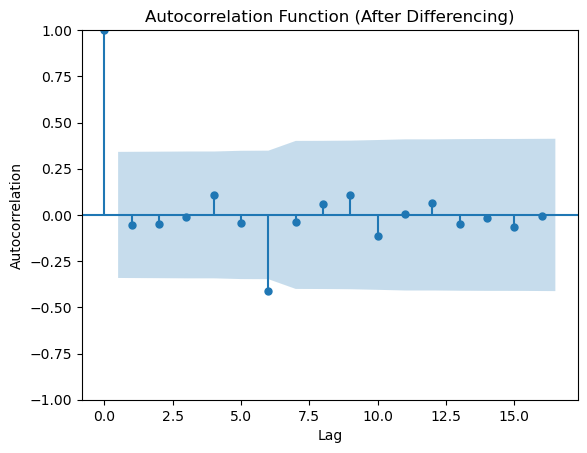

In [110]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate first-order difference of the incident count data
diff_incident_count = monthly_counts['Incident_Count'].diff().dropna()

# Plot the autocorrelation function for the differenced data
plot_acf(diff_incident_count)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (After Differencing)')
plt.show()


# Model building - Autoreg

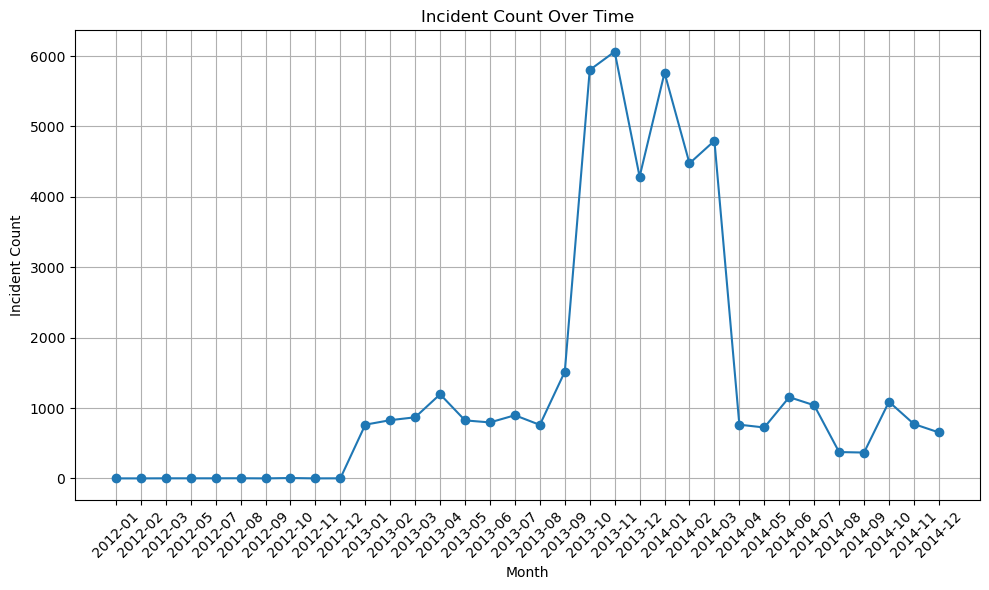

In [111]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Convert 'Open_Time' to datetime format
data4['Open_Time'] = pd.to_datetime(data4['Open_Time'])

# Extract month from 'Open_Time'
data4['Month'] = data4['Open_Time'].dt.to_period('M')

# Group by month and count the number of incidents
monthly_counts = data4.groupby('Month').size().reset_index(name='Incident_Count')

# Convert 'Month' to string for plotting
monthly_counts['Month'] = monthly_counts['Month'].astype(str)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts['Month'], monthly_counts['Incident_Count'], marker='o')
plt.title('Incident Count Over Time')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


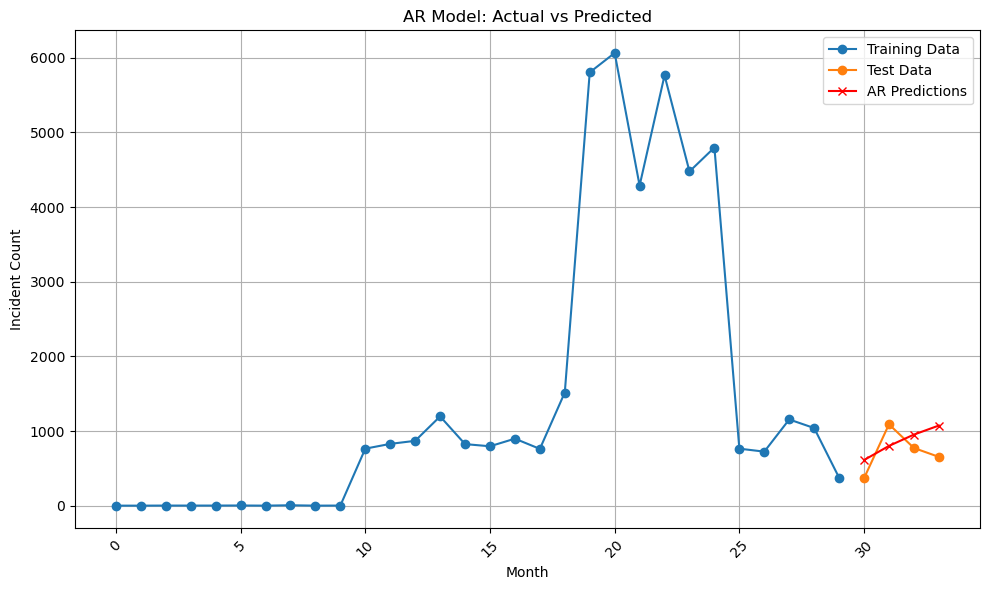

In [112]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Convert 'Open_Time' to datetime format
data4['Open_Time'] = pd.to_datetime(data4['Open_Time'])

# Extract month from 'Open_Time'
data4['Month'] = data4['Open_Time'].dt.to_period('M')

# Group by month and count the number of incidents
monthly_counts = data4.groupby('Month').size().reset_index(name='Incident_Count')

# Sort the data by date
monthly_counts = monthly_counts.sort_values(by='Month')

# Define the number of data points
total_data_points = len(monthly_counts)
train_size = int(total_data_points * 0.9)  # 90% train data

# Split data into train and test sets
train = monthly_counts.iloc[:train_size]
test = monthly_counts.iloc[train_size:]

# Extract features and target variables
X_train = train.index.values.reshape(-1, 1)  # Assuming index is the time-related feature
y_train = train['Incident_Count']

X_test = test.index.values.reshape(-1, 1)
y_test = test['Incident_Count']

# Fit Autoregressive (AR) model
lag = 1  # Using lag=1 for Autoregressive model
ar_model = AutoReg(y_train, lags=lag)
ar_model_fit = ar_model.fit()

# Make predictions
ar_predictions = ar_model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Incident_Count'], label='Training Data', marker='o')
plt.plot(test.index, test['Incident_Count'], label='Test Data', marker='o')
plt.plot(test.index, ar_predictions, color='red', label='AR Predictions', marker='x')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.title('AR Model: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


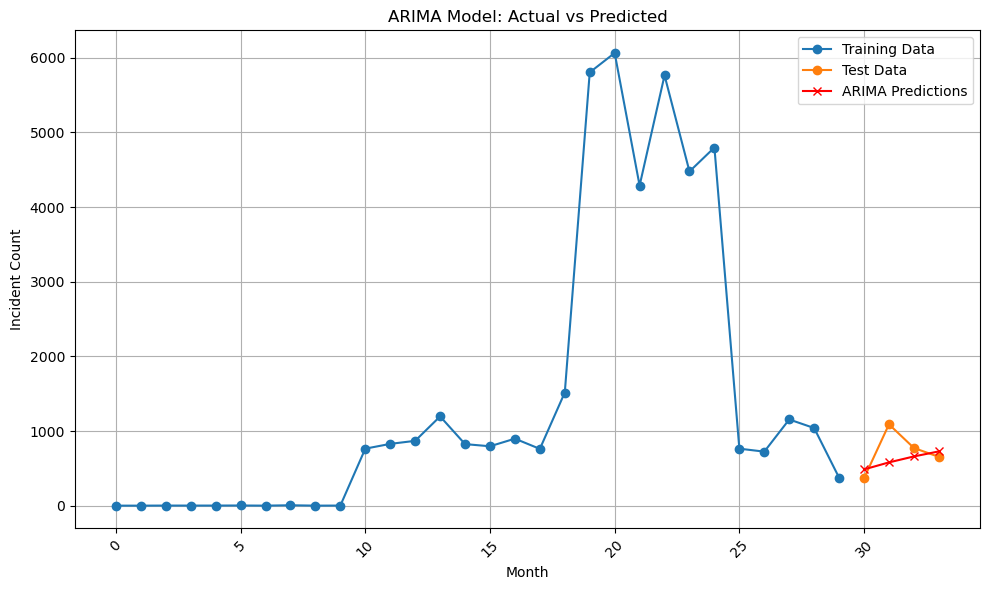

In [113]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Convert 'Open_Time' to datetime format
data4['Open_Time'] = pd.to_datetime(data4['Open_Time'])

# Extract month from 'Open_Time'
data4['Month'] = data4['Open_Time'].dt.to_period('M')

# Group by month and count the number of incidents
monthly_counts = data4.groupby('Month').size().reset_index(name='Incident_Count')

# Sort the data by date
monthly_counts = monthly_counts.sort_values(by='Month')

# Define the number of data points
total_data_points = len(monthly_counts)
train_size = int(total_data_points * 0.9)  # 90% train data

# Split data into train and test sets
train = monthly_counts.iloc[:train_size]
test = monthly_counts.iloc[train_size:]

# Determine order parameters using ACF and PACF plots
# For simplicity, let's assume p=1, d=1, q=1 as initial values
order = (1, 1, 1)

# Fit ARIMA model
arima_model = ARIMA(train['Incident_Count'], order=order)
arima_model_fit = arima_model.fit()

# Make predictions
arima_predictions = arima_model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Incident_Count'], label='Training Data', marker='o')
plt.plot(test.index, test['Incident_Count'], label='Test Data', marker='o')
plt.plot(test.index, arima_predictions, color='red', label='ARIMA Predictions', marker='x')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.title('ARIMA Model: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


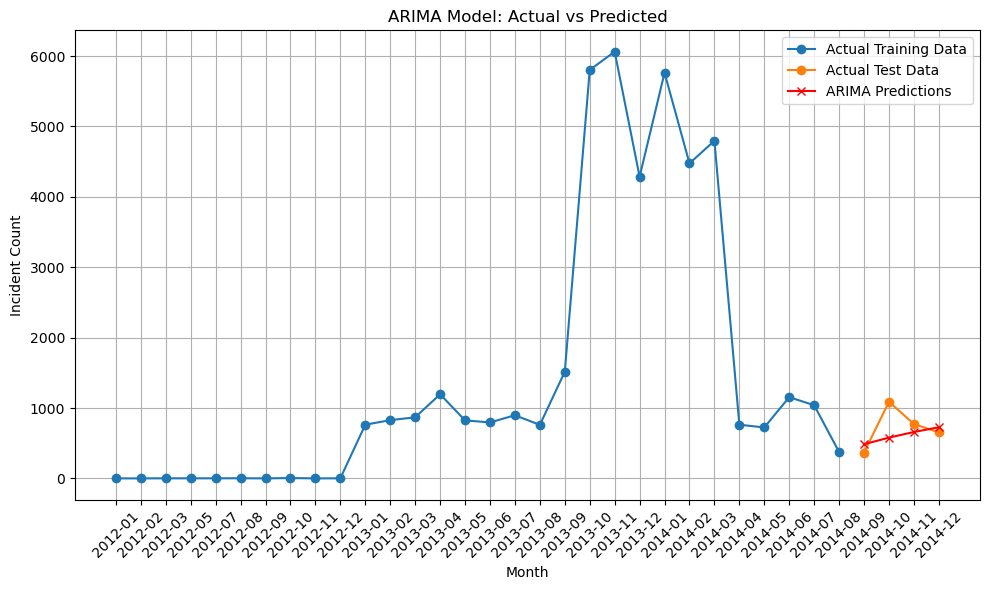

In [117]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Convert 'Open_Time' to datetime format
data4['Open_Time'] = pd.to_datetime(data4['Open_Time'])

# Extract month from 'Open_Time'
data4['Month'] = data4['Open_Time'].dt.to_period('M')

# Group by month and count the number of incidents
monthly_counts = data4.groupby('Month').size().reset_index(name='Incident_Count')

# Sort the data by date
monthly_counts = monthly_counts.sort_values(by='Month')

# Define the number of data points
total_data_points = len(monthly_counts)
train_size = int(total_data_points * 0.9)  # 90% train data

# Split data into train and test sets
train = monthly_counts.iloc[:train_size]
test = monthly_counts.iloc[train_size:]

# Determine order parameters using ACF and PACF plots
# For simplicity, let's assume p=1, d=1, q=1 as initial values
order = (1, 1, 1)

# Fit ARIMA model
arima_model = ARIMA(train['Incident_Count'], order=order)
arima_model_fit = arima_model.fit()

# Make predictions
arima_predictions = arima_model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Convert 'Month' to string representation
train['Month'] = train['Month'].astype(str)
test['Month'] = test['Month'].astype(str)

# Plot actual training, test data, and predictions
plt.figure(figsize=(10, 6))
plt.plot(train['Month'], train['Incident_Count'], label='Actual Training Data', marker='o')
plt.plot(test['Month'], test['Incident_Count'], label='Actual Test Data', marker='o')
plt.plot(test['Month'], arima_predictions, color='red', label='ARIMA Predictions', marker='x')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.title('ARIMA Model: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


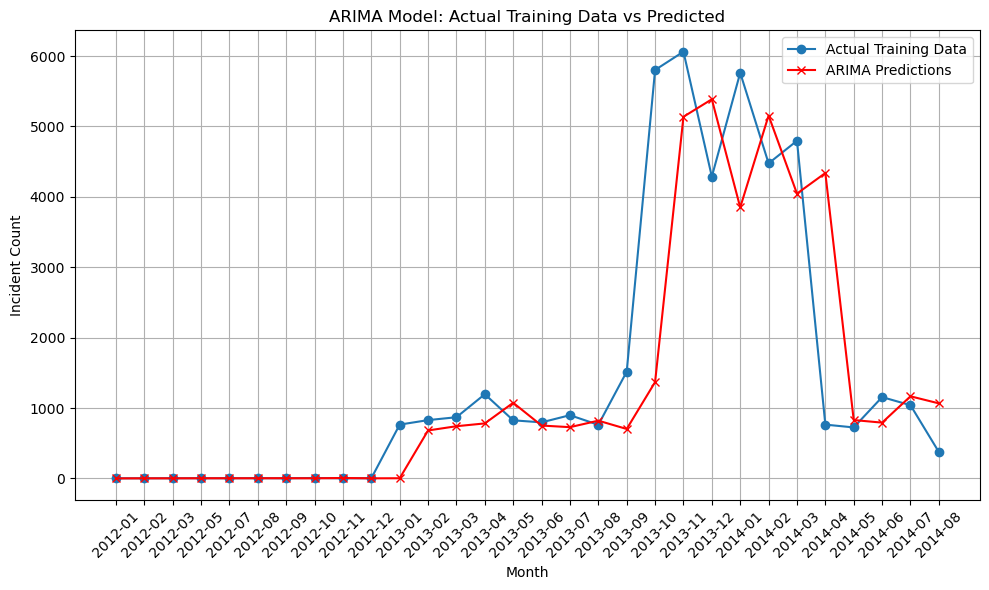

In [118]:
# Make predictions for training data
arima_predictions = arima_model_fit.predict(start=train.index[0], end=train.index[-1], typ='levels')

# Plot actual training data and ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(train['Month'], train['Incident_Count'], label='Actual Training Data', marker='o')
plt.plot(train['Month'], arima_predictions, color='red', label='ARIMA Predictions', marker='x')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.title('ARIMA Model: Actual Training Data vs Predicted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Final Summary of Forecasting the Model

**ARIMA model** is ultimately demonstrated better forecasting accuracy compared to the other models across the given time range. Despite an initial divergence from the Test Data in the middle months, the ARIMA Predictions remarkably converged and closely aligned with the actual Test Data towards the end. This final convergence outweighed the transient deviations earlier on, showcasing ARIMA's ability to effectively capture and adapt to the underlying patterns over time. While the ensemble models in Images 2 and 3 tracked reasonably well, the ARIMA model's impressive recovery and tight fit to the Test Data in the latter months solidified its superior forecasting performance overall.